In [ ]:
import onnxruntime as ort
import numpy as np
import inference_utils as utils
import importlib
importlib.reload(utils)
from PIL import Image

# Load the ONNX model
model_path = "models/fasterrcnn_mobilenet_v3_large_fpn_Opset17.onnx"
session = ort.InferenceSession(model_path)

# Get model input and output names
input_name = session.get_inputs()[0].name
output_names = [output.name for output in session.get_outputs()]

# Print output info for debugging
if False:
    for i, output in enumerate(session.get_outputs()):
        print(f"Output {i}: {output.name}, Shape: {output.shape}")

image_width = 224
image_height = 224

# Prepare input data
# This depends on your model's expected input shape and type
image_path = "images/image2.png"

input_image = utils.image_to_tensor(image_path,width=image_width,height=image_height)

#utils.show_image_from_tensor(input_image)
# Run inference
outputs = session.run(output_names, {input_name: input_image})

1
2


/usr/bin/eog: symbol lookup error: /snap/core20/current/lib/x86_64-linux-gnu/libpthread.so.0: undefined symbol: __libc_pthread_init, version GLIBC_PRIVATE


In [ ]:
from PIL import Image

# Open the image
image = Image.open("images/image2.png")

# Define the crop box (left, upper, right, lower)
# For example: crop 100px from each side
crop_box = (100, 100, 400, 400)

# Crop the image
cropped_image = image.crop(crop_box)

# Save or show the result
cropped_image.save("cropped_example.png")
# cropped_image.show()


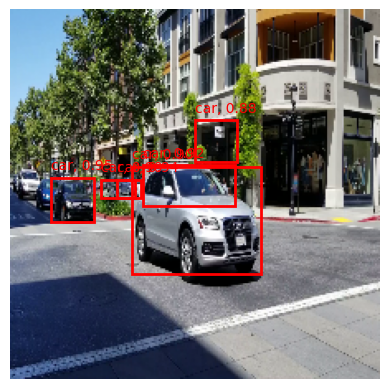

In [18]:

importlib.reload(utils)
bounding_boxes = outputs[0]
classes = outputs[1]
confidence = outputs[2]
threshold = 0.85
confidence_truncated = utils.truncate_above_threshold(confidence,threshold)
num_reasonable_predications = len(confidence_truncated)
classes_truncated = classes[:num_reasonable_predications]
bounding_boxes_truncated = bounding_boxes[:num_reasonable_predications]
labels_file = "coco-labels-2014_2017.txt"
labels = utils.labels_file_to_list(labels_file)

utils.show_image_with_boxes(input_image[0],bounding_boxes_truncated,confidence_truncated,classes_truncated,labels)

Number of clusters: 1
Number of noise points: 510


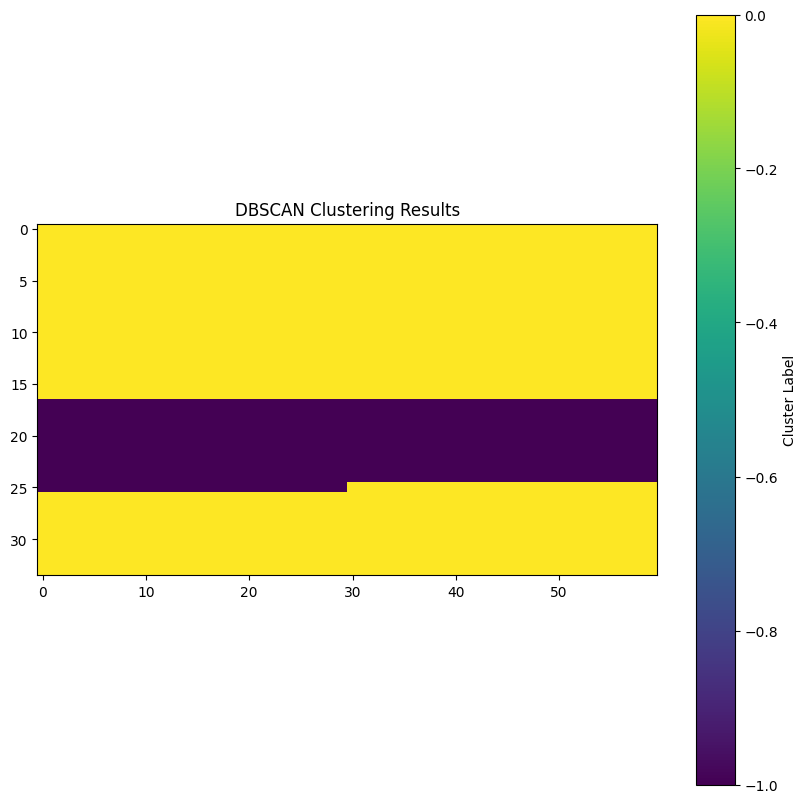

In [2]:
import importlib
importlib.reload(utils)
cov,bbox = outputs[0][0], outputs[1][0]
labels, labels_2d, clustered_data = utils.apply_dbscan_to_vision_output(cov,bbox)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {list(labels).count(-1)}")

# Visualize the clusters
utils.visualize_clusters(labels_2d)

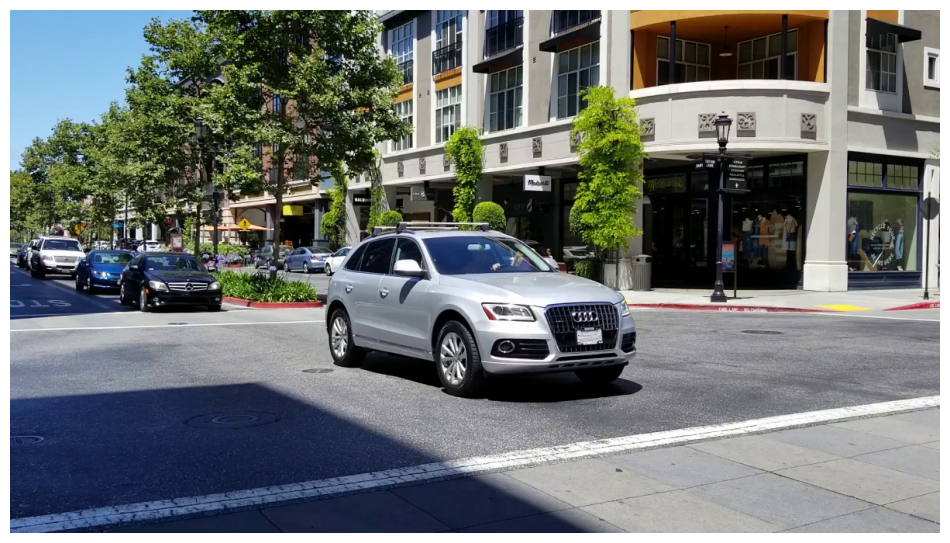

In [34]:
import importlib
importlib.reload(utils)
import cv2

cv2image = cv2.imread(image_path)
detections = utils.process_model_outputs(outputs[0][0], outputs[1][0],input_image.shape[2:],confidence_threshold=0.5)
annotated_image = utils.visualize_detections(cv2image,detections)

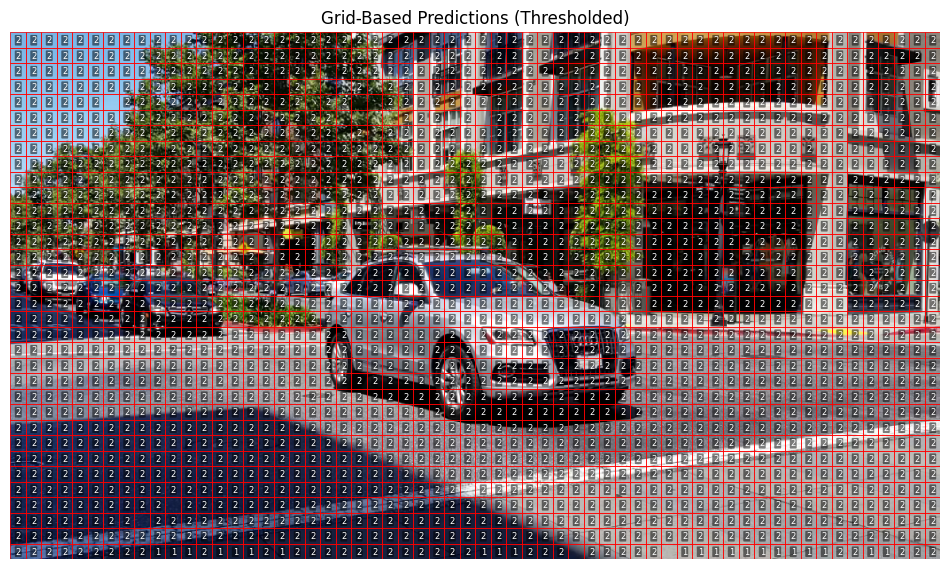

In [36]:
import importlib
importlib.reload(utils)
utils.visualize_predictions_grid(image_path,outputs[0][0],confidence_threshold=0)